## 데이터 로드

In [3]:
# 컬럼 정보

# index : 인덱스
# SEND_SPG_INNB : 송하인_격자공간고유번호
# REC_SPG_INNB : 수하인 격자공간고유번호
# DL_GD_LCLS_NM : 카테고리_대
# DL_GD_MCLS_NM : 카테고리_중
# INVC_CONT : 운송장 건 수

# 택배 운송량을 예측하여 비대면 경제의 발전을 예측


import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import patches
%matplotlib inline

train = pd.read_csv('C:/Users/김민성/Desktop/공모전/운송량 예측/235867_물류 유통량 예측 경진대회/train_df.csv', encoding='cp949')
test = pd.read_csv('C:/Users/김민성/Desktop/공모전/운송량 예측/235867_물류 유통량 예측 경진대회/test_df.csv', encoding='cp949')
sample_submission = pd.read_csv('C:/Users/김민성/Desktop/공모전/운송량 예측/235867_물류 유통량 예측 경진대회/sample_submission.csv', encoding='cp949')

# index, 종속변수 제거b
X_train = train.iloc[:,1:5]
# 종속변수(y) -> 운송량
y_train = train.iloc[:, -1]
X_test = test

train.shape
train.tail()
train.head(10)

# 결측치 확인 - 없음 
train.isnull().sum()
y_train.isnull().sum()


# 카테고리별 개수

print('카테고리_대 : ', len(train['DL_GD_LCLS_NM'].unique()))
print('카테고리_중 : ', len(train['DL_GD_MCLS_NM'].unique()))

train['DL_GD_MCLS_NM']
train['DL_GD_MCLS_NM'].unique()

카테고리_대 :  6
카테고리_중 :  20


array(['상의', '반려동물', '기타패션의류', '농산물', '가공식품', '스킨케어', '기타식품', '생활용품',
       '건강식품', '주방용품', '건강용품', '냉동/간편조리식품', '문구/사무용품', '축산', '문화컨텐츠',
       '음반', '음료', '수산', '과자', '기타디지털/가전'], dtype=object)

## Encoding

In [4]:
from sklearn.preprocessing import LabelEncoder
import numpy as np

# Label Encoding
encoder_M = LabelEncoder()
train['DL_GD_MCLS_NM'] = encoder_M.fit_transform(train['DL_GD_MCLS_NM'])
# train["label_MCLS"] = encoder_M.fit_transform(train['DL_GD_MCLS_NM'])

encoder_L = LabelEncoder()
train['DL_GD_LCLS_NM'] = encoder_L.fit_transform(train['DL_GD_LCLS_NM'])
# train["label_LCLS"] = encoder_L.fit_transform(train['DL_GD_LCLS_NM'])

encoder_M = LabelEncoder()
test['DL_GD_MCLS_NM'] = encoder_M.fit_transform(test['DL_GD_MCLS_NM'])
# test["label_MCLS"] = encoder_M.fit_transform(test['DL_GD_MCLS_NM'])

encoder_L = LabelEncoder()
test['DL_GD_LCLS_NM'] = encoder_L.fit_transform(test['DL_GD_LCLS_NM'])
# test["label_LCLS"] = encoder_L.fit_transform(test['DL_GD_LCLS_NM'])

# Label Encoding
encoder_S = LabelEncoder()
train['SEND_SPG_INNB'] = encoder_S.fit_transform(train['SEND_SPG_INNB'])
test['SEND_SPG_INNB'] = encoder_S.fit_transform(test['SEND_SPG_INNB'])

encoder_R = LabelEncoder()
train['REC_SPG_INNB'] = encoder_R.fit_transform(train['REC_SPG_INNB'])
test['REC_SPG_INNB'] = encoder_R.fit_transform(test['REC_SPG_INNB'])

# one-hot encoding
Train = pd.get_dummies(train, columns = ['DL_GD_LCLS_NM', 'DL_GD_MCLS_NM'])

Test = pd.get_dummies(test, columns = ['DL_GD_LCLS_NM', 'DL_GD_MCLS_NM'])

## 클래스 분포 확인

In [ ]:
import numpy as np

X_train.loc[:, ['DL_GD_LCLS_NM', 'DL_GD_MCLS_NM']].value_counts()

# 카테고리 대 클래스 분포 확인
Large_cat = X_train['DL_GD_LCLS_NM'].value_counts()
# print(X_train['DL_GD_LCLS_NM'].value_counts())
print()
# 식품에 치우쳐있음
Mid_cat = X_train['DL_GD_MCLS_NM'].value_counts()
# print(X_train['DL_GD_MCLS_NM'].value_counts())



X_train_Cook = X_train.loc[:, ['DL_GD_LCLS_NM', 'DL_GD_MCLS_NM']][X_train['DL_GD_LCLS_NM'] == '식품']
X_train_Cook_ = X_train_Cook['DL_GD_MCLS_NM'].unique()
X_train_Cook_.shape

print(X_train.loc[:, ['DL_GD_LCLS_NM', 'DL_GD_MCLS_NM']].value_counts())
cook = X_train_Cook['DL_GD_MCLS_NM'].value_counts()


DL_GD_LCLS_NM  DL_GD_MCLS_NM
식품             농산물              22162
여행/문화          문화컨텐츠             1192
식품             음료                1126
               수산                 931
               가공식품               923
               기타식품               766
               건강식품               651
생활/건강          음반                 635
식품             축산                 418
               냉동/간편조리식품          413
생활/건강          반려동물               358
식품             과자                 348
생활/건강          생활용품               343
               주방용품               328
패션의류           상의                 321
               기타패션의류             261
디지털/가전         기타디지털/가전           241
화장품/미용         스킨케어               227
생활/건강          문구/사무용품            180
               건강용품               176
dtype: int64


식품        27738
생활/건강      2020
여행/문화      1192
패션의류        582
디지털/가전      241
화장품/미용      227
Name: DL_GD_LCLS_NM, dtype: int64


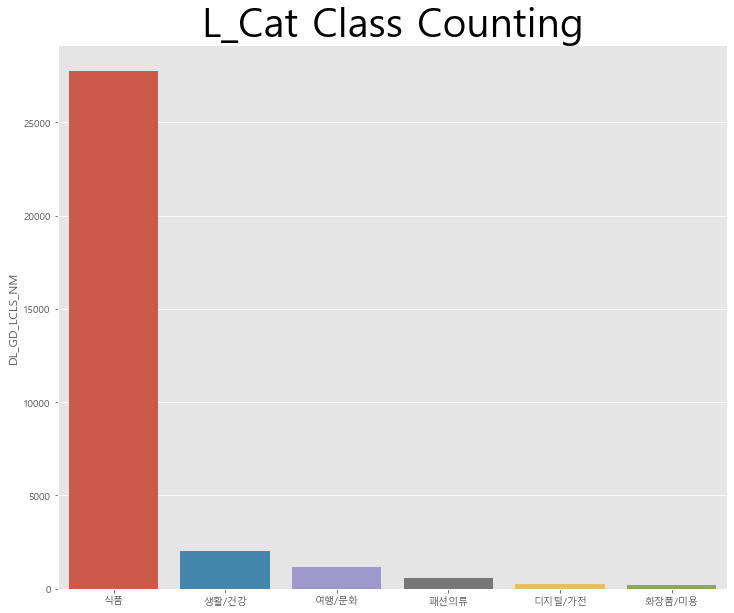

In [ ]:
# 카테고리 대 클래스 분포

plt.rc('font', family='Malgun Gothic')
plt.style.use('ggplot')
plt.figure(figsize=(12,10))
plt.title('L_Cat Class Counting', fontsize=40)
value_bar_ax = sns.barplot(x=Large_cat.index, y=Large_cat)
value_bar_ax.tick_params(labelsize=10)

print(Large_cat)

# 식품에 대해서 언더샘플링 필요

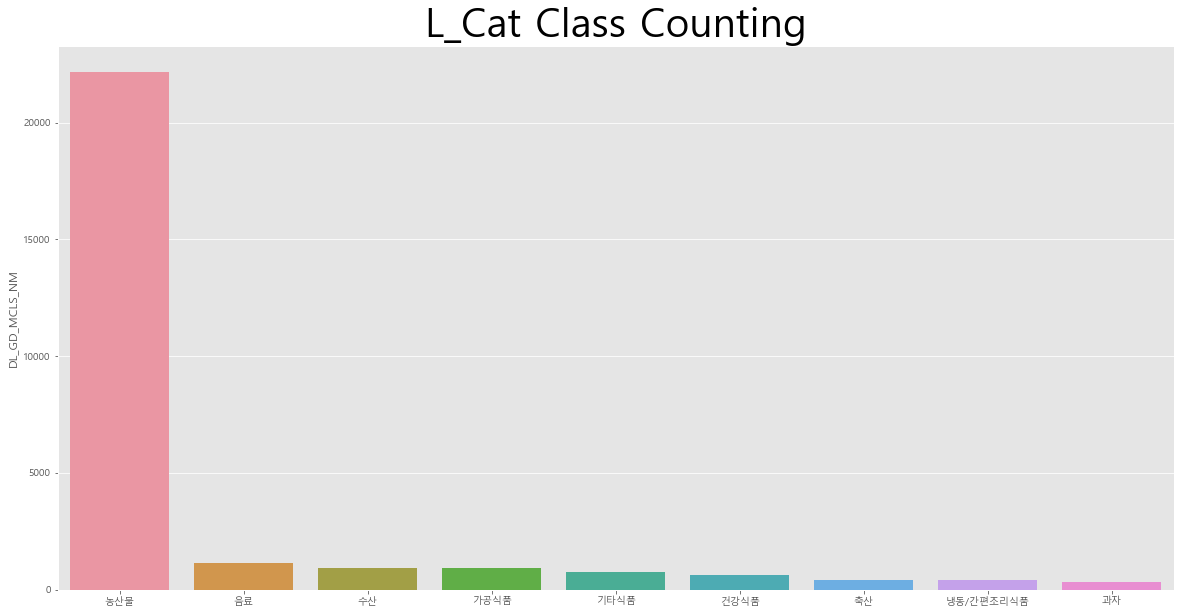

In [ ]:
# 식품(대카테고리)안의 클래스 분포

plt.rc('font', family='Malgun Gothic')
plt.style.use('ggplot')
plt.figure(figsize=(20,10))
plt.title('L_Cat Class Counting', fontsize=40)
value_bar_ax = sns.barplot(x=cook.index, y=cook)
value_bar_ax.tick_params(labelsize=10)

#  농산물에 대해서 언더샘플링 필요함

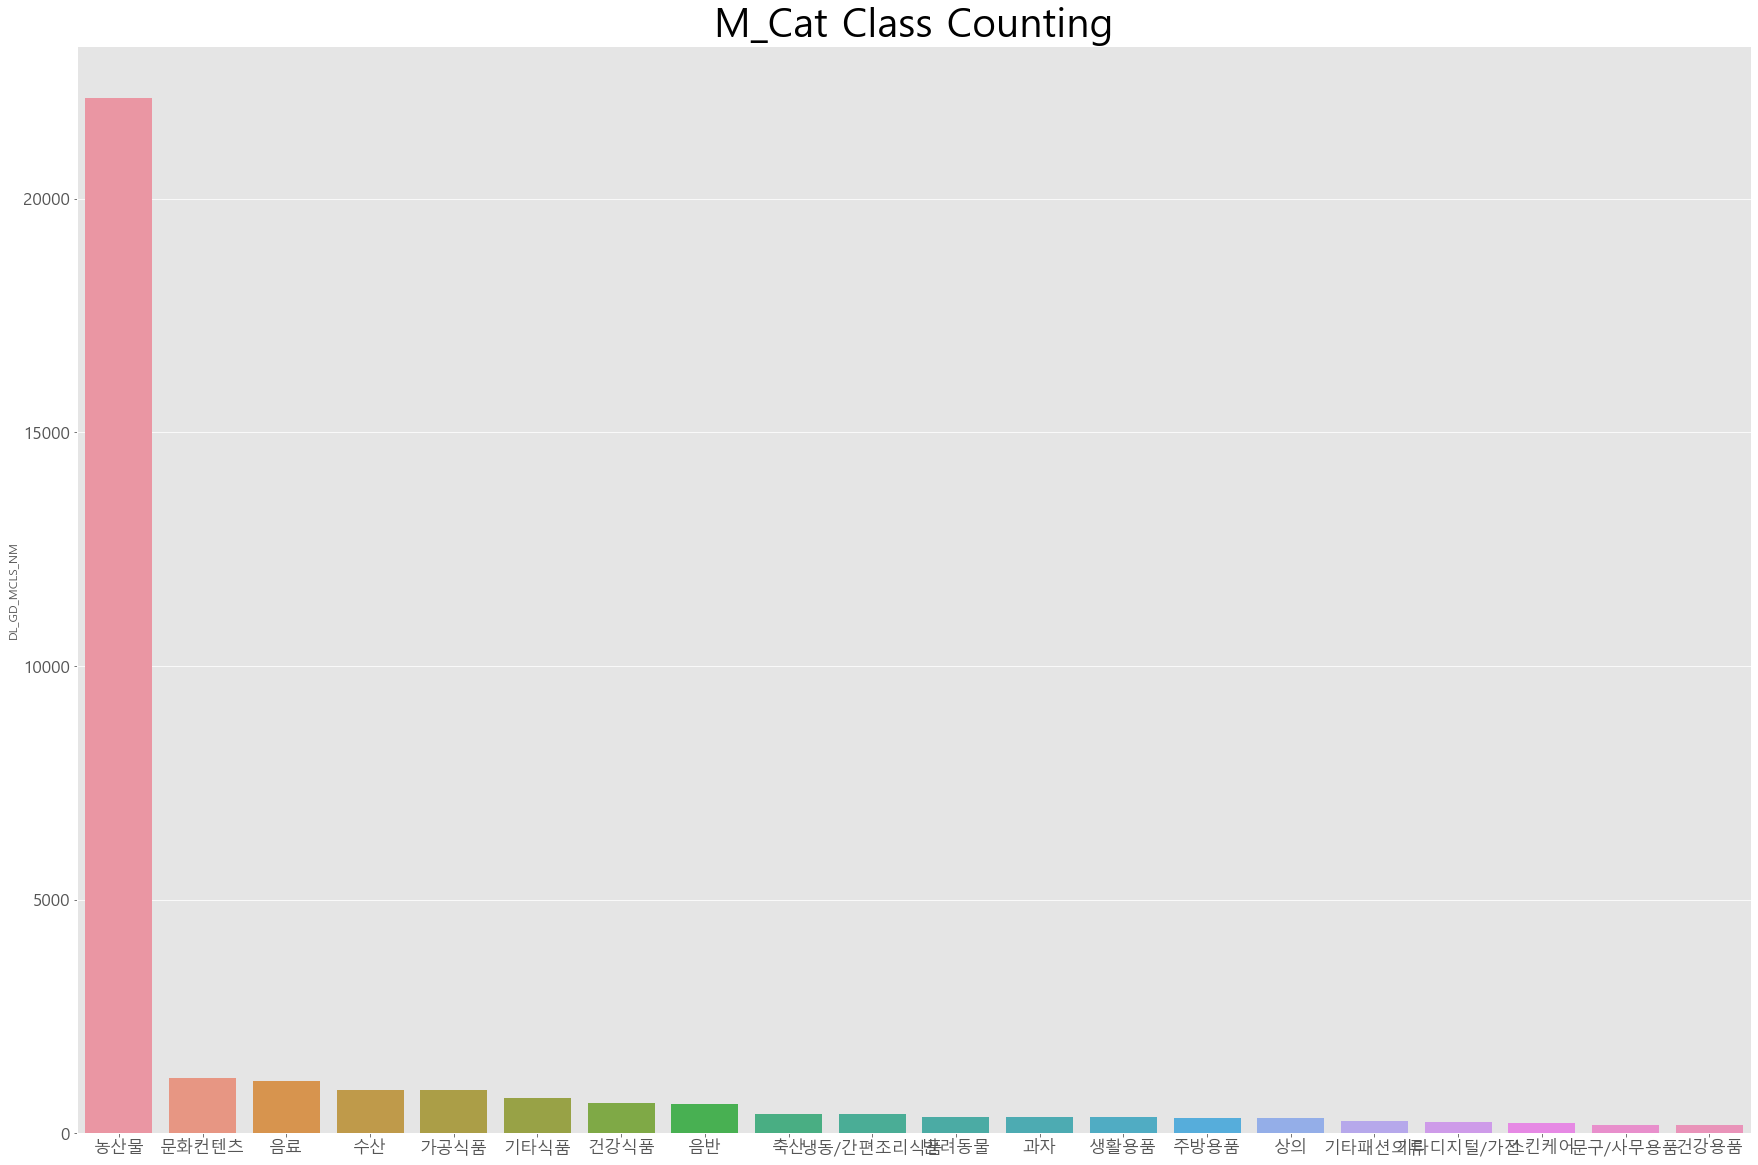

In [ ]:
# 카테고리 중 클래스 분포

plt.rc('font', family='Malgun Gothic')
plt.style.use('ggplot')
plt.figure(figsize=(30,20))
plt.title('M_Cat Class Counting', fontsize=40)
value_bar_ax = sns.barplot(x=Mid_cat.index, y=Mid_cat)
value_bar_ax.tick_params(labelsize=17)
# tick -> 축

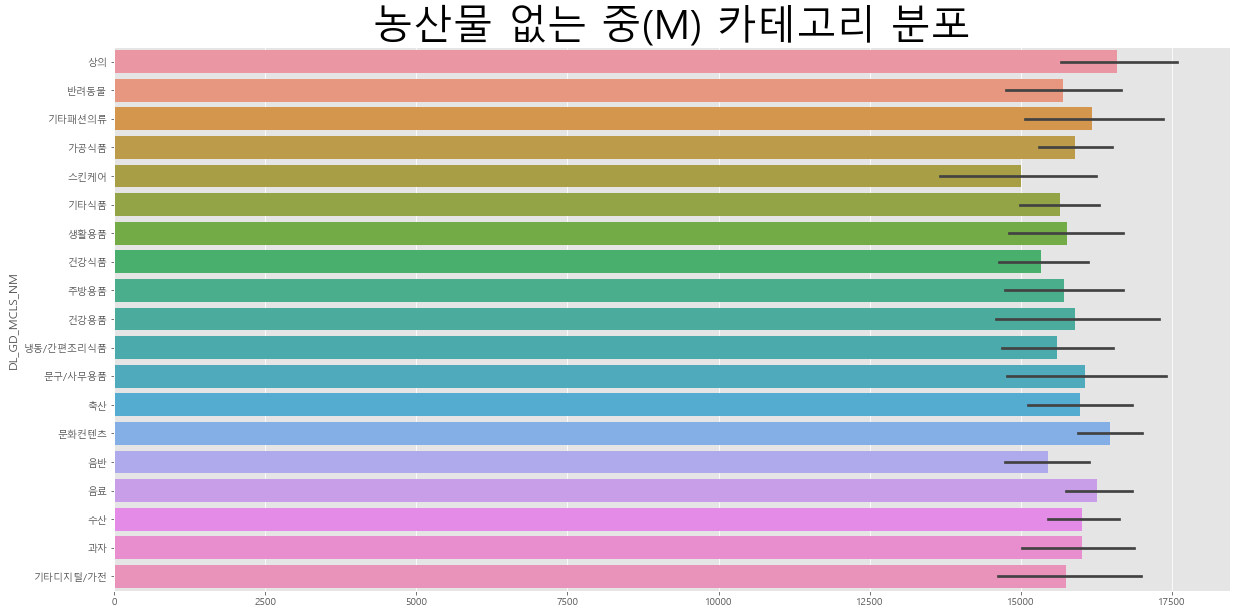

In [ ]:
idx = X_train[X_train['DL_GD_MCLS_NM'] == '농산물'].index
mid = X_train.drop(idx, inplace = True)
x_cook = X_train['DL_GD_MCLS_NM']

plt.rc('font', family='Malgun Gothic')
plt.style.use('ggplot')
plt.figure(figsize=(20,10))
plt.title('농산물 없는 중(M) 카테고리 분포', fontsize=40)
value_bar_ax = sns.barplot(x=x_cook.index, y=x_cook)
value_bar_ax.tick_params(labelsize=10)

## 종속변수 확인

In [ ]:
y_sorted = y_train.sort_values(ascending = False)
y_count = len(y_train.unique())
print('운송량 개수 종류: ', y_count, '\n')

print(train['INVC_CONT'].describe(), '\n')

print('운송량 가장 많은 것: ', train[train['INVC_CONT']  == 239], '\n')

print('총운송량: ', train['INVC_CONT'].sum())

# 카테고리별 개수

print('카테고리_대 : ', len(train['DL_GD_LCLS_NM'].unique()))
print('카테고리_중 : ', len(train['DL_GD_MCLS_NM'].unique()))

운송량 개수 종류:  90 

count    32000.000000
mean         4.767875
std          5.752122
min          3.000000
25%          3.000000
50%          3.000000
75%          5.000000
max        239.000000
Name: INVC_CONT, dtype: float64 

운송량 가장 많은 것:         index  SEND_SPG_INNB  REC_SPG_INNB  DL_GD_LCLS_NM  DL_GD_MCLS_NM  \
22968  22968            757         24964              4              6   

       INVC_CONT  
22968        239   

총운송량:  152572
카테고리_대 :  6
카테고리_중 :  20


In [ ]:
# 농산물 없는 데이터 통계

idx = train[train['DL_GD_MCLS_NM'] == '농산물'].index
mid = train.drop(idx, inplace = True)
x_cook = train['DL_GD_MCLS_NM']
train.describe()

,index,SEND_SPG_INNB,REC_SPG_INNB,DL_GD_LCLS_NM,DL_GD_MCLS_NM,INVC_CONT,label_MCLS,label_LCLS
count,32000.000000,3.200000e+04,3.200000e+04,32000.000000,32000.000000,32000.000000,32000.000000,32000.000000
mean,15999.500000,4.729981e+15,3.713145e+15,2.016719,8.546219,4.767875,8.546219,2.016719
std,9237.748643,7.387136e+14,1.320618e+15,0.516549,3.455411,5.752122,3.455411,0.516549
min,0.000000,1.111000e+15,1.111000e+15,0.000000,0.000000,3.000000,0.000000,0.000000
25%,7999.750000,5.011000e+15,2.820000e+15,2.000000,8.000000,3.000000,8.000000,2.000000
50%,15999.500000,5.011000e+15,4.146500e+15,2.000000,8.000000,3.000000,8.000000,2.000000
75%,23999.250000,5.013000e+15,4.812350e+15,2.000000,8.000000,5.000000,8.000000,2.000000
max,31999.000000,5.013000e+15,5.013000e+15,5.000000,19.000000,239.000000,19.000000,5.000000


## 상관관계

                  INVC_CONT  DL_GD_MCLS_NM_0  DL_GD_MCLS_NM_1  \
INVC_CONT          1.000000         0.061099         0.025365   
DL_GD_MCLS_NM_0    0.061099         1.000000        -0.024835   
DL_GD_MCLS_NM_1    0.025365        -0.024835         1.000000   
DL_GD_MCLS_NM_2    0.070730        -0.012816        -0.010717   
DL_GD_MCLS_NM_3    0.018218        -0.018071        -0.015110   
DL_GD_MCLS_NM_4    0.026955        -0.015013        -0.012553   
DL_GD_MCLS_NM_5    0.037100        -0.026989        -0.022567   
DL_GD_MCLS_NM_6    0.088406        -0.015628        -0.013068   
DL_GD_MCLS_NM_7    0.004759        -0.019706        -0.016478   
DL_GD_MCLS_NM_8   -0.122762        -0.258662        -0.216287   
DL_GD_MCLS_NM_9    0.040955        -0.012962        -0.010838   
DL_GD_MCLS_NM_10   0.006532        -0.033899        -0.028346   
DL_GD_MCLS_NM_11  -0.005987        -0.018331        -0.015328   
DL_GD_MCLS_NM_12  -0.019162        -0.017348        -0.014506   
DL_GD_MCLS_NM_13   0.0027

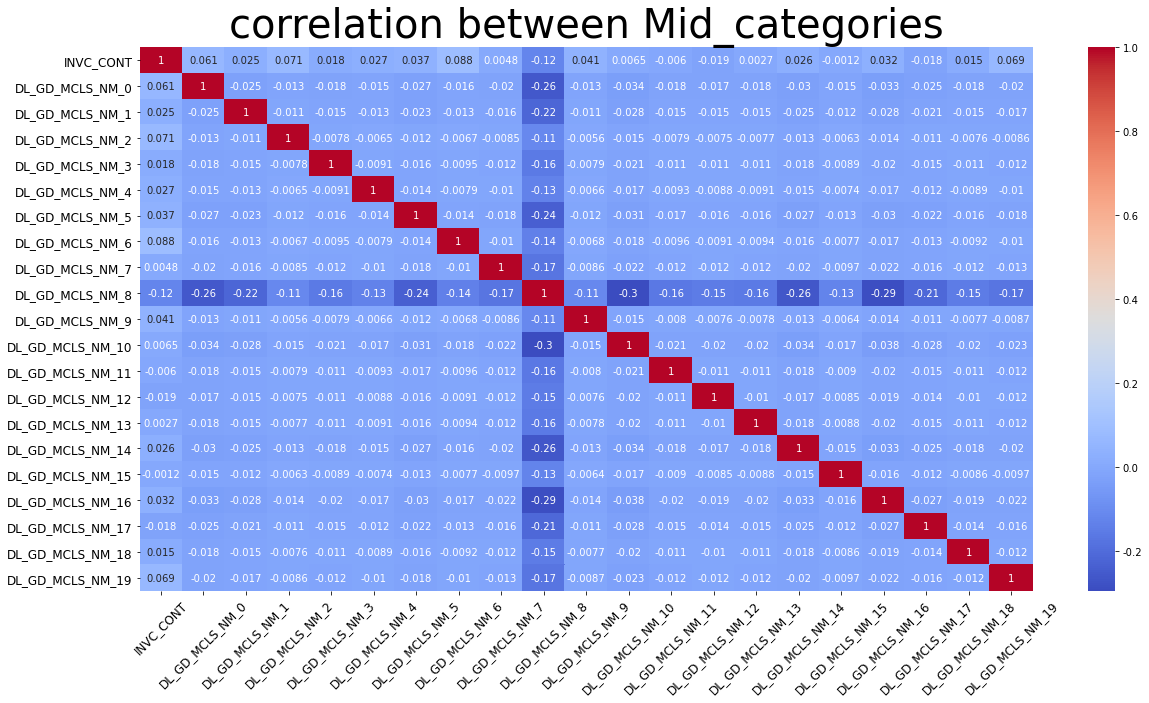

<Figure size 432x288 with 0 Axes>

In [ ]:
plt.figure(figsize=(20,10))
plt.rc('axes', unicode_minus=False)

# 중분류만 보는 Heatmap
heat_table = Train.drop(['index','SEND_SPG_INNB','REC_SPG_INNB', 'DL_GD_LCLS_NM_0',
                        'DL_GD_LCLS_NM_1','DL_GD_LCLS_NM_2','DL_GD_LCLS_NM_3','DL_GD_LCLS_NM_4',
                        'DL_GD_LCLS_NM_5'], axis=1).corr()

print(heat_table)
heatmap_ax = sns.heatmap(heat_table, annot=True, cmap='coolwarm')
heatmap_ax.set_xticklabels(heatmap_ax.get_xticklabels(), fontsize=12, rotation=45)
heatmap_ax.set_yticklabels(heatmap_ax.get_yticklabels(), fontsize=12)
plt.title('correlation between Mid_categories', fontsize=40)
plt.show()

plt.savefig("Corr.jpg")

                  INVC_CONT  DL_GD_LCLS_NM_0  DL_GD_LCLS_NM_1  \
INVC_CONT          1.000000         0.026955         0.028883   
DL_GD_LCLS_NM_0    0.026955         1.000000        -0.022612   
DL_GD_LCLS_NM_1    0.028883        -0.022612         1.000000   
DL_GD_LCLS_NM_2   -0.048645        -0.222232        -0.662202   
DL_GD_LCLS_NM_3    0.006532        -0.017135        -0.051058   
DL_GD_LCLS_NM_4    0.045214        -0.011856        -0.035329   
DL_GD_LCLS_NM_5   -0.001250        -0.007363        -0.021940   
DL_GD_MCLS_NM_0    0.061099        -0.015013        -0.044734   
DL_GD_MCLS_NM_1    0.025365        -0.012553        -0.037406   
DL_GD_MCLS_NM_2    0.070730        -0.006478         0.286496   
DL_GD_MCLS_NM_3    0.018218        -0.009134        -0.027218   
DL_GD_MCLS_NM_4    0.026955         1.000000        -0.022612   
DL_GD_MCLS_NM_5    0.037100        -0.013642        -0.040650   
DL_GD_MCLS_NM_6    0.088406        -0.007899        -0.023539   
DL_GD_MCLS_NM_7    0.0047

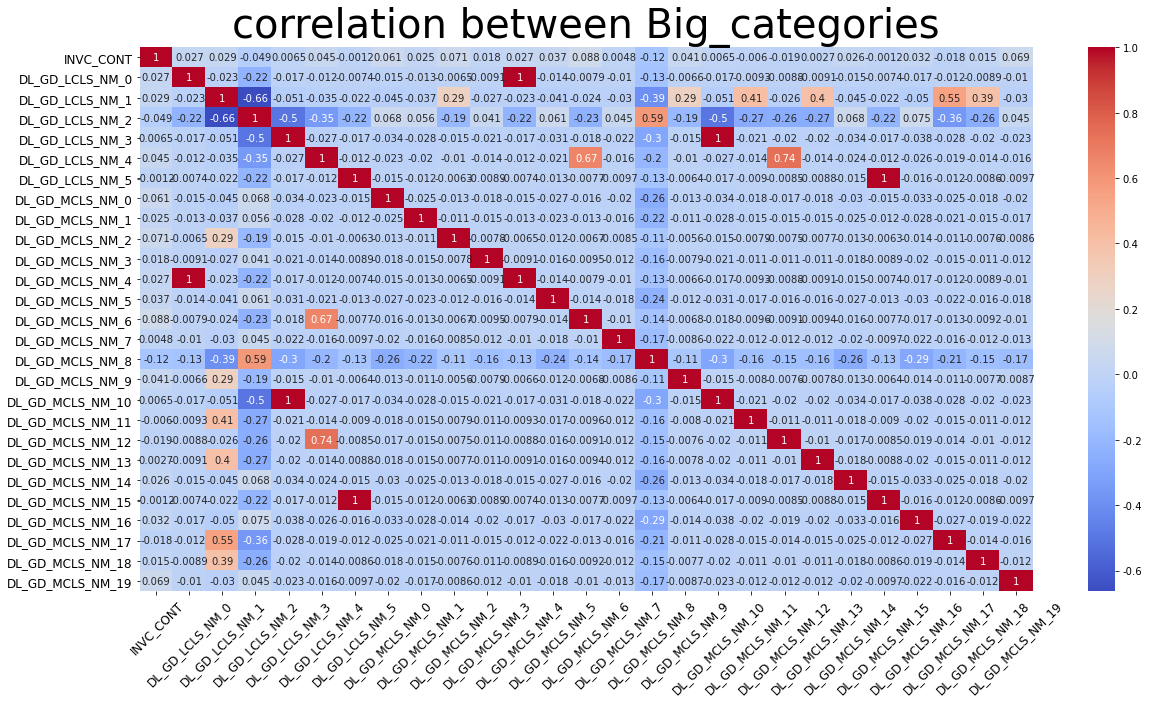

<Figure size 432x288 with 0 Axes>

In [ ]:
plt.figure(figsize=(20,10))
plt.rc('axes', unicode_minus=False)

# 대분류만 보는 Heatmap
heat_table = Train.drop(['index','SEND_SPG_INNB','REC_SPG_INNB'], axis=1).corr()

print(heat_table)
heatmap_ax = sns.heatmap(heat_table, annot=True, cmap='coolwarm')
heatmap_ax.set_xticklabels(heatmap_ax.get_xticklabels(), fontsize=12, rotation=45)
heatmap_ax.set_yticklabels(heatmap_ax.get_yticklabels(), fontsize=12)
plt.title('correlation between Big_categories', fontsize=40)
plt.show()

plt.savefig("Corr_Big.jpg")

In [ ]:
Train["DL_GD_LCLS_NM_5"].value_counts()

0    31773
1      227
Name: DL_GD_LCLS_NM_5, dtype: int64

<AxesSubplot:title={'center':'INVC_CONT'}, xlabel='DL_GD_LCLS_NM'>

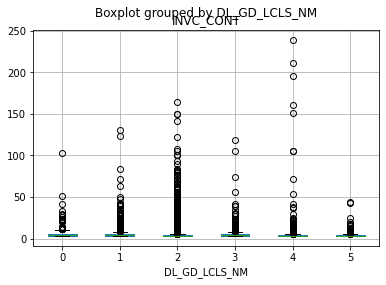

In [ ]:
train.boxplot('INVC_CONT', 'DL_GD_LCLS_NM')

<AxesSubplot:title={'center':'INVC_CONT'}, xlabel='DL_GD_MCLS_NM'>

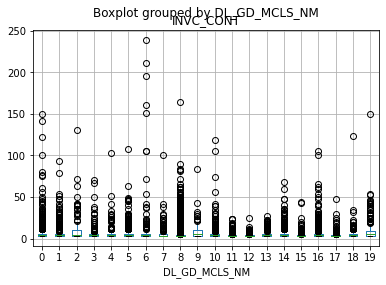

In [ ]:
train.boxplot('INVC_CONT', 'DL_GD_MCLS_NM')

C:\Users\doong\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


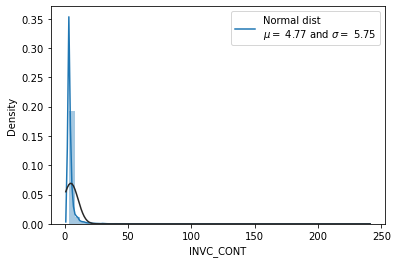

In [ ]:
from scipy.stats import norm, skew
sns.distplot(train.INVC_CONT, fit = norm)
(mu, sigma) = norm.fit(Train['INVC_CONT'])
plt.legend(['Normal dist\n$\mu=$ {:.2f} and $\sigma=$ {:.2f}'.format(mu, sigma)], loc = 'best')
plt.show()

C:\Users\doong\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


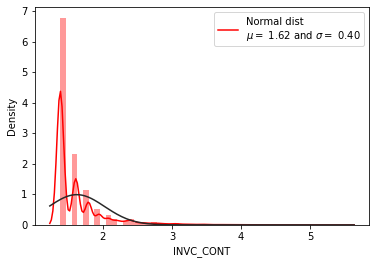

In [ ]:
sns.distplot(np.log1p(train.INVC_CONT), fit = norm, color = 'r')
(mu, sigma) = norm.fit(np.log1p(train['INVC_CONT']))
plt.legend(['Normal dist\n$\mu=$ {:.2f} and $\sigma=$ {:.2f}'.format(mu, sigma)],loc = 'best')
plt.show()

In [ ]:
Train.drop("index", axis=1, inplace=True)

In [ ]:
Train

,SEND_SPG_INNB,REC_SPG_INNB,INVC_CONT,DL_GD_LCLS_NM_0,DL_GD_LCLS_NM_1,DL_GD_LCLS_NM_2,DL_GD_LCLS_NM_3,DL_GD_LCLS_NM_4,DL_GD_LCLS_NM_5,DL_GD_MCLS_NM_0,...,DL_GD_MCLS_NM_10,DL_GD_MCLS_NM_11,DL_GD_MCLS_NM_12,DL_GD_MCLS_NM_13,DL_GD_MCLS_NM_14,DL_GD_MCLS_NM_15,DL_GD_MCLS_NM_16,DL_GD_MCLS_NM_17,DL_GD_MCLS_NM_18,DL_GD_MCLS_NM_19
0,118,24066,3,0,0,0,0,1,0,0,...,0,0,1,0,0,0,0,0,0,0
1,137,23662,3,0,1,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
2,143,24382,9,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
3,218,24820,10,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,287,23658,3,0,0,1,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31995,2913,5160,6,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
31996,2934,3863,5,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
31997,2941,11722,9,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
31998,2947,1278,3,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
# #아웃라이어
# def get_outlier(df, column, weight=1.5):
#       # target 값과 상관관계가 높은 열을 우선적으로 진행
#   quantile_25 = np.percentile(Train[column].values, 0)
#   quantile_75 = np.percentile(Train[column].values, 95)

#   IQR = quantile_75 - quantile_25
#   IQR_weight = IQR*weight
  
#   lowest = quantile_25 - IQR_weight
#   highest = quantile_75 + IQR_weight
  
#   outlier_idx = df[column][ (df[column] < lowest) | (df[column] > highest) ].index
#   return outlier_idx

# outlier_idx = get_outlier(Train, "INVC_CONT", weight=1.5)
# print(len(outlier_idx))
# Train.drop(outlier_idx, axis=0, inplace=True)

468


<AxesSubplot:title={'center':'INVC_CONT'}, xlabel='DL_GD_LCLS_NM'>

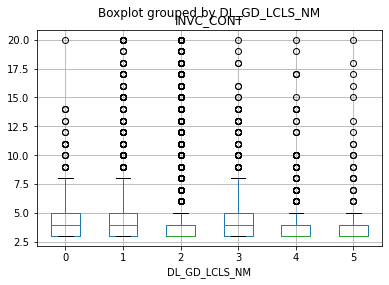

In [ ]:
train.boxplot('INVC_CONT', 'DL_GD_LCLS_NM')

<AxesSubplot:title={'center':'INVC_CONT'}, xlabel='DL_GD_MCLS_NM'>

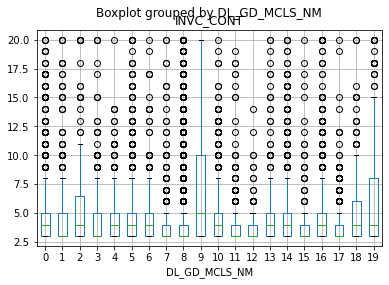

In [ ]:
train.boxplot('INVC_CONT', 'DL_GD_MCLS_NM')

In [ ]:
Train.describe()

,index,SEND_SPG_INNB,REC_SPG_INNB,INVC_CONT,DL_GD_LCLS_NM_0,DL_GD_LCLS_NM_1,DL_GD_LCLS_NM_2,DL_GD_LCLS_NM_3,DL_GD_LCLS_NM_4,DL_GD_LCLS_NM_5,...,DL_GD_MCLS_NM_10,DL_GD_MCLS_NM_11,DL_GD_MCLS_NM_12,DL_GD_MCLS_NM_13,DL_GD_MCLS_NM_14,DL_GD_MCLS_NM_15,DL_GD_MCLS_NM_16,DL_GD_MCLS_NM_17,DL_GD_MCLS_NM_18,DL_GD_MCLS_NM_19
count,32000.000000,32000.000000,32000.000000,32000.000000,32000.000000,32000.000000,32000.000000,32000.000000,32000.000000,32000.000000,...,32000.000000,32000.000000,32000.000000,32000.000000,32000.000000,32000.000000,32000.000000,32000.000000,32000.000000,32000.000000
mean,15999.500000,2344.954656,14502.947219,4.767875,0.007531,0.063125,0.866812,0.037250,0.018187,0.007094,...,0.037250,0.011187,0.010031,0.010719,0.029094,0.007094,0.035187,0.019844,0.010250,0.013062
std,9237.748643,908.476216,8279.118860,5.752122,0.086457,0.243191,0.339783,0.189377,0.133631,0.083926,...,0.189377,0.105179,0.099654,0.102977,0.168072,0.083926,0.184256,0.139465,0.100724,0.113544
min,0.000000,0.000000,0.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,7999.750000,1867.000000,7250.750000,3.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,15999.500000,2560.000000,14626.500000,3.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,23999.250000,3151.000000,22146.250000,5.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,31999.000000,3683.000000,27825.000000,239.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [ ]:
Train.to_csv("train(전처리 끝).csv")

In [ ]:
Test.to_csv("test(전처리 끝).csv")

In [ ]:
train['DL_GD_LCLS_NM'].value_counts()

2    27738
1     2020
3     1192
4      582
0      241
5      227
Name: DL_GD_LCLS_NM, dtype: int64